In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Problem description
Find intersection point of $M$ overlapping convex sets
$$\begin{array}{ll}
\mbox{minimize } & \sum_{i=1}^M \|v-x_i\|_2^2\\
\mbox{subject to }& A_ix_i\leq b_i \mbox{ for }i=1,\ldots,M\\
\end{array}$$

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [6]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=30)

k=0, rel_gap=inf, L=0.0, U=7.922656459450639
k=1, rel_gap=inf, L=0.0, U=7.922656459450639
k=2, rel_gap=inf, L=0.0, U=4.558378100418025
k=3, rel_gap=inf, L=0.0, U=2.6432256077215324
k=4, rel_gap=inf, L=0.0, U=1.5328709168623593
k=5, rel_gap=inf, L=0.0, U=0.8825329573481909
k=6, rel_gap=inf, L=0.0, U=0.5057476468496815
k=7, rel_gap=inf, L=0.0, U=0.2888631512272173
k=8, rel_gap=inf, L=0.0, U=0.16513904828674258
k=9, rel_gap=inf, L=0.0, U=0.09397183094799508
k=10, rel_gap=inf, L=0.0, U=0.05338419407052204
k=11, rel_gap=inf, L=0.0, U=0.03025589836359106
k=12, rel_gap=inf, L=0.0, U=0.01712147741836117
k=13, rel_gap=inf, L=0.0, U=0.009674579647449107
k=14, rel_gap=inf, L=0.0, U=0.005467864574226974
k=15, rel_gap=inf, L=0.0, U=0.0030924785250334816
k=16, rel_gap=inf, L=0.0, U=0.0017514299953113345
k=17, rel_gap=inf, L=0.0, U=0.000989779597849303
k=18, rel_gap=inf, L=0.0, U=0.0005582982968851959
k=19, rel_gap=inf, L=0.0, U=0.00031453389409639765
k=20, rel_gap=inf, L=0.0, U=0.0001770393581580485

# Centralized solution

In [7]:
x_cvx, prob_cvx, h_cvx = ob.cvx_intersection_cvx_sets(params=params)

In [8]:
h_cvx, prob.upper_bnd[-1]

(3.1946417353249873e-18, 7.014169142083609e-06)

# Plot

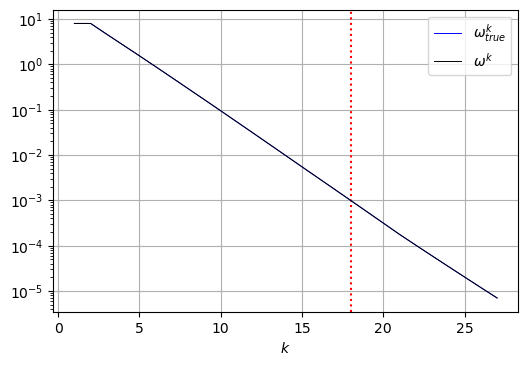

In [9]:
ob.plot_true_abs_gap_uk(lk=prob.lower_bnd, uk=prob.upper_bnd, h_true=h_cvx)